## IS 362 Assignment 13
### Mushroom Dataset

- Create a pandas DataFrame with a subset of the columns in the dataset. You should include the column that indicates edible or poisonous, the column that includes odor, and at least one other column of your choosing.
- Add meaningful names for each column.
- Replace the codes used in the data with numeric values—for example, in the first “target” column, “e” might become 0 and “p” might become 1. This is because your downstream processing in Project 4 using scikit-learn requires that values be stored as numerics.
- Perform exploratory data analysis: show the distribution of data for each of the columns you selected, and show scatterplots for edible/poisonous vs. odor as well as the other column that you selected.
- Include some text describing your preliminary conclusions about whether either of the other columns could be helpful in predicting if a specific mushroom is edible or poisonous.

In [1]:
# import modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
%matplotlib inline

We'll want to import the data source, while
- specifying we only want the columns for toxicity, odor and habitat while
- applying header names

In [2]:
mushrooms = pd.read_csv("agaricus-lepiota.data", header = None, usecols = [0,5,22], names = ['toxic', 'odor', 'habitat'])
mushrooms

,toxic,odor,habitat
0,p,p,u
1,e,a,g
2,e,l,m
3,p,p,u
4,e,n,g
...,...,...,...
8119,e,n,l
8120,e,n,l
8121,e,n,l
8122,p,y,l


Next, we'll want to replace header values with integers:

In [3]:
mushrooms.replace(to_replace={"toxic":{'p': 1, 'e': 0}}, inplace=True)
mushrooms.replace(to_replace={'odor':{'a':0, 'l':1, 'c':2, 'y':3, 'f':4, 'm':5, 'n':6, 'p':7, 's':8}}, inplace=True)
mushrooms.replace(to_replace={'habitat':{'g':0, 'l':1, 'm':2, 'p':3, 'u':4, 'w':5, 'd':6}}, inplace=True)
mushrooms

,toxic,odor,habitat
0,1,7,4
1,0,0,0
2,0,1,2
3,1,7,4
4,0,6,0
...,...,...,...
8119,0,6,1
8120,0,6,1
8121,0,6,1
8122,1,3,1


## Odor / Toxicity
Mushrooms with strong odor are likely to be toxic. Note that odor # 6 is none, and has a value at zero.

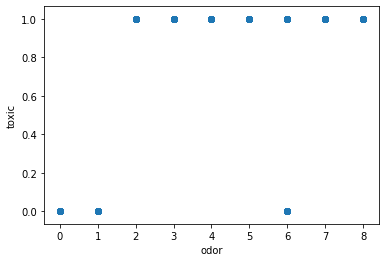

In [4]:
pyplot.scatter(mushrooms.odor, mushrooms.toxic)
pyplot.xlabel('odor')
pyplot.ylabel('toxic')
pyplot.show()

## Habitat / Toxicity
Toxic mushrooms can be found in all habitats except for waste (# 5).

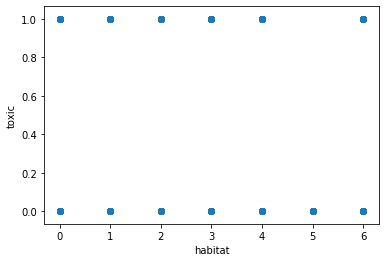

In [5]:
pyplot.scatter(mushrooms.habitat, mushrooms.toxic)
pyplot.xlabel('habitat')
pyplot.ylabel('toxic')
pyplot.show()

# Odor / Habitat / Toxicity
Comparing all three criteria, we can see that toxicity is less with low odor mushrooms along all habitats.

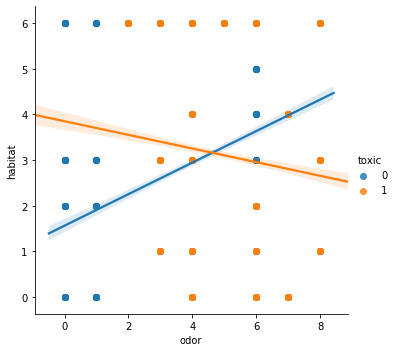

In [6]:
sns.lmplot('odor', 'habitat', data=mushrooms, hue='toxic')
pyplot.show()